In [1]:
#this is for plotting images 
import matplotlib.pyplot as plt
#this is for dealing with images and pixels
from PIL import Image
import numpy as np 
import cv2

In [2]:
img = cv2.imread('Mars.jpg')
blue_channel, green_channel, red_channel = cv2.split(img)

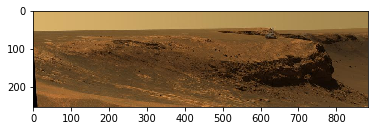

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
def dilationOrErosion(blue_channel,green_channel,red_channel,img,length,width,makeDilation):
    
    leftDist=int(width/2)
    upDist=int(length/2)
    newImgB=np.zeros((blue_channel.shape))
    newImgG=np.zeros((green_channel.shape))
    newImgR= np.zeros((red_channel.shape))

   
    for i in range(leftDist,img.shape[0]-leftDist):
        for j in range(upDist,img.shape[1]-upDist): 
                   
                    if(makeDilation):
                        maxB, maxG, maxR=getMaxOrMin(blue_channel,green_channel,red_channel,i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,True)
                        newImgB[i][j] += maxB
                        newImgG[i][j] += maxG
                        newImgR[i][j] += maxR
                    else:
                        minB, minG, minR=getMaxOrMin(blue_channel,green_channel,red_channel,i-leftDist,i+leftDist+1,j-upDist,j+upDist+1,length,width,False)
                        newImgB[i][j] += minB
                        newImgG[i][j] += minG
                        newImgR[i][j] += minR
    newImg = cv2.merge((newImgB, newImgG, newImgR))                   
    return newImg
                   

In [5]:
def getMaxOrMin(blue_channel,green_channel,red_channel,starti,endi,startj,endj,LStrElem,WStrElem,getMax):
    
    outputBlue=np.zeros(WStrElem*LStrElem)
    outputGreen=np.zeros(WStrElem*LStrElem)
    outputRed=np.zeros(WStrElem*LStrElem)
    
    index=0
    for k in range(starti,endi):
        for m in range(startj,endj):
            #BGR
            outputBlue[index]+=blue_channel[k][m]
            outputGreen[index]+=green_channel[k][m]
            outputRed[index]+=red_channel[k][m]
            index+=1
    if(getMax):
        return max(outputBlue),max(outputGreen),max(outputRed)
    else:
        return min(outputBlue),min(outputGreen),min(outputRed)
            

In [6]:
def closing(blue_channel, green_channel, red_channel,img,length,width):
    dilation=dilationOrErosion(blue_channel, green_channel, red_channel,img,length,width,True)
    new_blue,new_green,new_red= cv2.split(dilation)
    erosion=dilationOrErosion(new_blue,new_green,new_red,dilation,length,width,False)
    return erosion

In [7]:
def opening(blue_channel, green_channel, red_channel,img,length,width):
    erosion=dilationOrErosion(blue_channel, green_channel, red_channel,img,length,width,False)
    new_blue,new_green,new_red = cv2.split(erosion)
    dilation=dilationOrErosion(new_blue,new_green,new_red,erosion,length,width,True)
    return erosion
    

## Deliverables

### Structuring Element: 3x3 with a=1, b=1

In [8]:
opened=opening(blue_channel, green_channel, red_channel,img,3,3)
closed=closing(blue_channel, green_channel, red_channel,img,3,3)

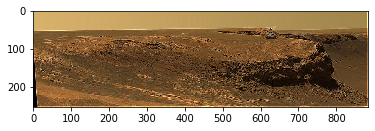

True

In [9]:
a = 1
b = 1
incContrast = np.clip(img +(a*(img-opened)) -(b*(closed-img)),0,255)
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('IncContrast311.jpg',incContrast)

In [10]:
first=img-opened
second=closed-img
first = first.astype(np.uint8)
second = second.astype(np.uint8)

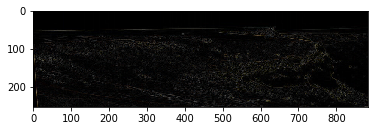

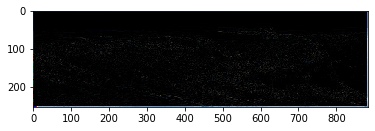

In [11]:
plt.imshow(cv2.cvtColor(first, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(second, cv2.COLOR_BGR2RGB))
plt.show()

### Structuring Element: 3x3 with a=1, b=5

In [12]:
a = 1
b = 5
incContrast = np.clip(img + (a*(img-opened)) - (b*(closed-img)),0,255)

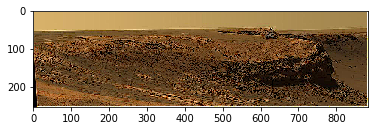

True

In [13]:
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('IncContrast315.jpg',incContrast)

### Structuring Element: 3x3 with a=5, b=1

In [14]:
a = 5
b = 1
incContrast = np.clip(img + (a*(img-opened)) - (b*(closed-img)),0,255)

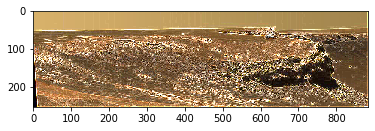

True

In [15]:
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('IncContrast351.jpg',incContrast)

### Structuring Element: 9x9 with a=1, b=1

In [17]:
opened9=opening(blue_channel, green_channel, red_channel,img,9,9)
closed9=closing(blue_channel, green_channel, red_channel,img,9,9)

In [18]:
a = 1
b = 1
incContrast = np.clip(img + ((a*(img-opened9)) - (b*(closed9-img))),0,255)

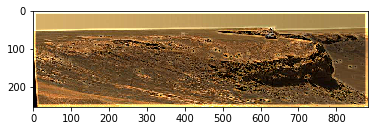

True

In [19]:
incContrast = incContrast.astype(np.uint8)
plt.imshow(cv2.cvtColor(incContrast, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('IncContrast911.jpg',incContrast)

# Question : Comment on the effect of increase the structuring element size on the output image?

when the size of the structuring element increases the contrast increase because the contrast for a structuring element of size 9*9 is more than that of 5*5 which is in fact more than the 3*3

# Question : Comment on the effect of increasing or decreasing a and b on the output image?

increasing the a makes the image more bighter ,increasing the b makes the image more darker 

# Suggest an expression that could decrease the contrast using morphological operators.

imgDecContrast = I - (a *(I - opened )) + (b * ( closed-I ))
this will make the bright pixels (pixels with high values darker and pixels with low values brighter and this will decrease the contrast)